In [1]:
# 1. Importar as Bibliotecas Necessárias
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import entropy
import math
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import completeness_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score

In [3]:
data = pd.read_csv("./dataset/dados.csv")

X = data.iloc[:, :-1].values  # Excluindo a coluna 'Class' ou a última coluna
y_true = data['Class'].values

# 3. Normalizar os Dados
scaler = StandardScaler()
x = scaler.fit_transform(X) 


In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

In [15]:
best = -1
best_i = 0
best_j = 0

for max_iter in (100,200,300,400,500):
    kmeans = KMeans(n_clusters=2, max_iter=max_iter, random_state=0)
    kmeans.fit(X_pca)

    score = silhouette_score(X_pca, kmeans.labels_)

    if(score > best):
        best_j = max_iter

print(best_j)
kmeans = KMeans(n_clusters=2, max_iter=best_j, random_state=0)
labels_pred = kmeans.fit_predict(X_pca)

print("\nCoesão: ", math.sqrt(kmeans.inertia_)/kmeans.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(X_pca,kmeans.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(y_true,kmeans.labels_))

print("\nSeparação: ", pairwise_distances(kmeans.cluster_centers_).mean())

print("\nRand Score K-means: ",metrics.rand_score(y_true, kmeans.labels_))

print("\nCompletude: ", completeness_score(y_true, kmeans.labels_))

print("\nEntropia: ", entropy(np.bincount(kmeans.labels_)/len(kmeans.labels_)))


500

Coesão:  26.76787091598586

Coeficiente de Silhueta:  0.3391013849554237

Homogeneidade :  0.00021532341645099257

Separação:  1.2857925677927204

Rand Score K-means:  0.5009589589589589

Completude:  0.00019108852168349855

Entropia:  0.6883374644776967


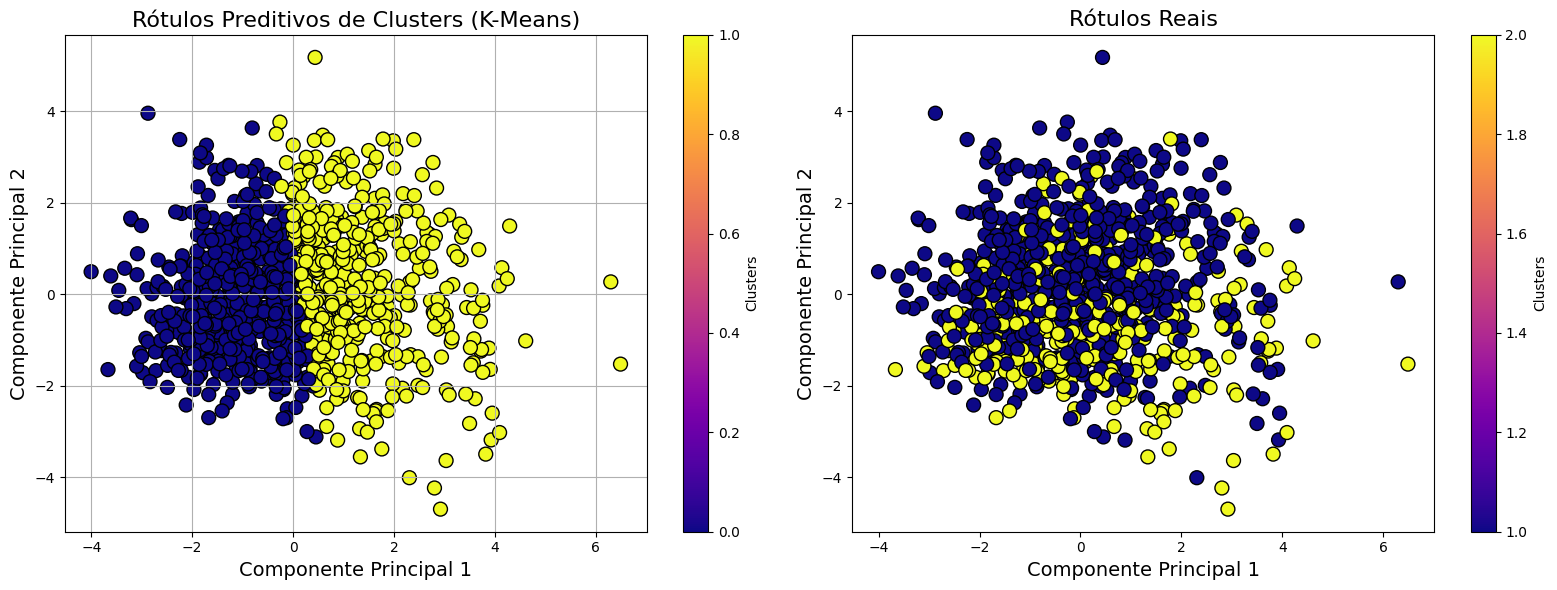

In [156]:
# Função para plotar os resultados
plt.figure(figsize=(16, 6))    
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='plasma', marker='o', edgecolor='k', s=100)
plt.title('Rótulos Reais', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(scatter, label='Clusters')

# Segundo Subplot: Rótulos Preditivos de Clusters
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pred, cmap='plasma', marker='o', edgecolor='k', s=100)
plt.title('Rótulos Preditivos de Clusters (K-Means)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(scatter, label='Clusters')
plt.grid(True)

# Salvar a Figura
plt.tight_layout()
plt.show()



In [7]:
import csv

def contar_elementos_por_linha_csv(arquivo):
  """Conta a quantidade de elementos em cada linha de um arquivo CSV.

  Args:
    arquivo: O nome do arquivo CSV a ser processado.

  Returns:
    Uma lista com a contagem de elementos em cada linha.
  """

  contagens = []
  with open(arquivo, 'r') as csvfile:
    reader = csv.reader(csvfile)
    for linha in reader:
      contagens.append(len(linha))
  return contagens

# Exemplo de uso:
arquivo_csv = "./dataset/dados.csv"  # Substitua pelo nome do seu arquivo CSV
resultado = contar_elementos_por_linha_csv(arquivo_csv)

resultado = any(elemento < 21 for elemento in resultado)

print(resultado)

False


In [14]:
best_score = -1
best_eps = 0
best_min_samples = 0

for eps in (0.1, 0.2, 0.3, 0.4, 0.5):
    for min_samples in (3, 5, 7, 10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)  # Create DBSCAN object

        # Only fit the model once outside the loop
        dbscan.fit(X_pca)

        if len(set(dbscan.labels_)) > 1:  # Verifica se há mais de 1 cluster
            score = silhouette_score(X_pca, dbscan.labels_)
            
            # Verificar se o score atual é melhor que o melhor score já encontrado
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Best EPS: {best_eps}, Best Min Samples: {best_min_samples}, Best Silhouette Score: {best_score:.4f}')

# Aplicar DBSCAN com os melhores parâmetros encontrados
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_pred = dbscan.fit_predict(X_pca)


print("\nCoeficiente de Silhueta: ", silhouette_score(X_pca,dbscan.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(y_true,dbscan.labels_))

print("\nRand Score: ",metrics.rand_score(y_true, dbscan.labels_))

print("\nCompletude: ", completeness_score(y_true, dbscan.labels_))



Best EPS: 0.5, Best Min Samples: 5, Best Silhouette Score: 0.4522

Coeficiente de Silhueta:  0.4521785306974983

Homogeneidade :  0.0011452750114068892

Rand Score:  0.5748468468468468

Completude:  0.005192195063765026


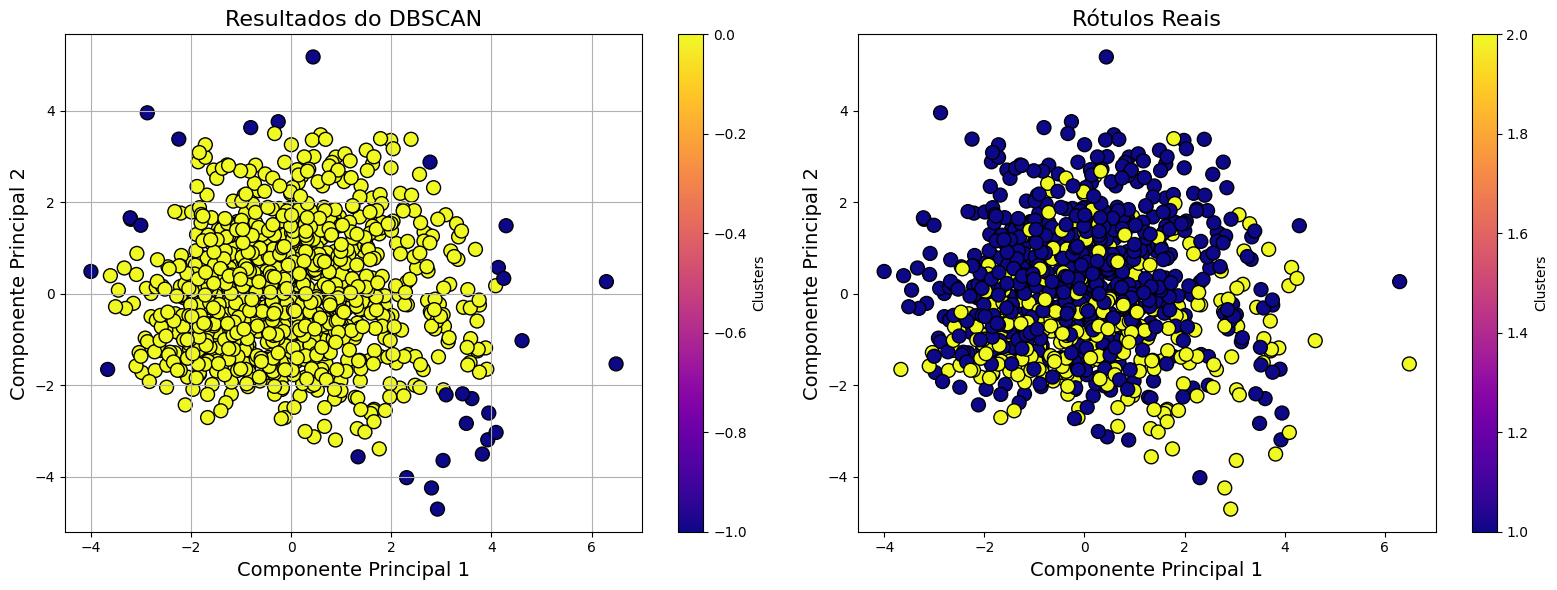

In [159]:
plt.figure(figsize=(16, 6))    
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='plasma', marker='o', edgecolor='k', s=100)
plt.title('Rótulos Reais', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(scatter, label='Clusters')

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pred, cmap='plasma', marker='o', edgecolor='k', s=100)
plt.title('Resultados do DBSCAN', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(scatter, label='Clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
best_score = -1

for linkage in ('ward', 'complete', 'average', 'single'):
    for distance_threshold in (10, 15, 20, 25):
        agnes = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold, linkage=linkage)
        agnes.fit(X_pca)

        if len(set(agnes.labels_)) > 1:
            score = silhouette_score(X_pca, agnes.labels_)

            if score > best_score:
                best_score = score
                best_linkage = linkage
                best_distance = distance_threshold


print(f'Best linkage: {best_linkage}, Best distance: {best_distance}, Best Silhouette Score: {best_score:.4f}')

agnes = AgglomerativeClustering(n_clusters=None, distance_threshold=best_distance, linkage=best_linkage)
labels_pred = agnes.fit_predict(X_pca)


print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(X_pca,agnes.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(y_true,agnes.labels_))

print("\nRand Score: ",metrics.rand_score(y_true, agnes.labels_))

print("\nCompletude: ", completeness_score(y_true, agnes.labels_))

print("\nEntropia: ", entropy(np.bincount(agnes.labels_)/len(agnes.labels_)))

Best linkage: complete, Best distance: 10, Best Silhouette Score: 0.3179

Coeficiente de Silhueta:  0.31785423736669277

Homogeneidade :  0.025581144527286093

Rand Score K-means:  0.5886306306306306

Completude:  0.0483975453571502

Entropia:  0.3228801767137002


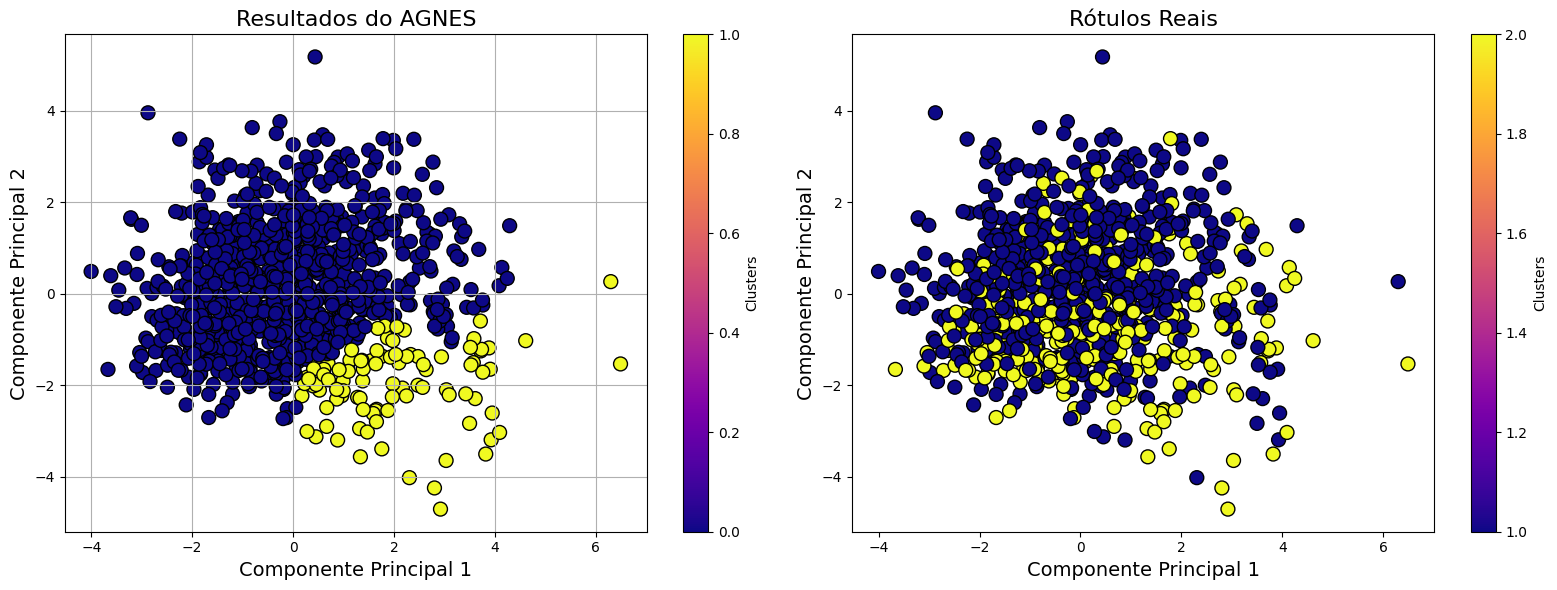

In [161]:
plt.figure(figsize=(16, 6))    
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='plasma', marker='o', edgecolor='k', s=100)
plt.title('Rótulos Reais', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(scatter, label='Clusters')

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pred, cmap='plasma', marker='o', edgecolor='k', s=100)
plt.title('Resultados do AGNES', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(scatter, label='Clusters')
plt.grid(True)
plt.tight_layout()
plt.show()